# LAB5 - object description

**objectives:**

* use image labeling
* describe object using contours
* detection of angles in an object


## Image labeling and contour coding


label:1 area:5633
label:2 area:4631
label:3 area:1719
label:4 area:5797
label:5 area:3497
label:6 area:5
label:7 area:2963
label:8 area:3001
label:9 area:3417
label:10 area:718
label:11 area:6
label:12 area:5898
label:13 area:2952
label:14 area:3320
label:15 area:809
label:16 area:1989
label:17 area:2129
label:18 area:7716
label:19 area:7592


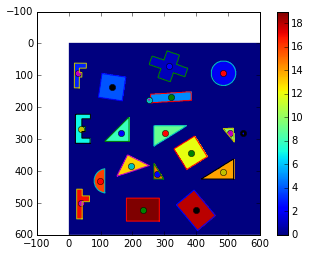

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread
from skimage.measure import label, regionprops,find_contours

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/600px-Formes.png')[:,:,0]
ima = (ima>0).astype(int)
lab,nlab = label(ima,return_num=True) #ensure that ima is binary
props = regionprops(lab)

plt.imshow(lab)
plt.colorbar();

for obj in props:
    print('label:%d area:%d'%(obj.label,obj.area))
    perim = find_contours(lab,obj.label-1)[0]
    plt.plot(obj.centroid[1],obj.centroid[0],'o')
    plt.plot(perim[:,1],perim[:,0])


starting from the example above

1. extract connected components of image [600px-Formes.png](http://homepages.ulb.ac.be/~odebeir/data/600px-Formes.png)
1. display object centroid see [label()](http://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=label#skimage.measure.label) and [regionprops()](http://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=regionprops#skimage.measure.regionprops)
1. for each image label, extract the coordinates of the contour and find the corners of each objects
1. suggest a method to classify the objects in different categories

## The watershed transform

/home/olivier/anaconda/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


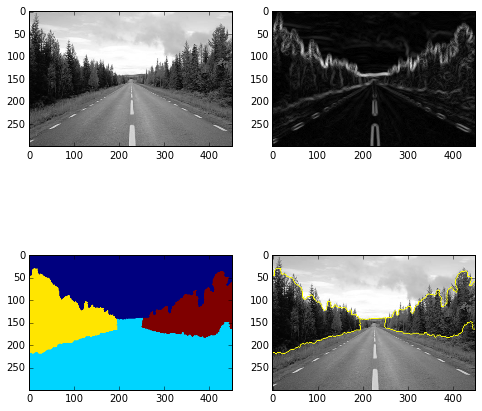

In [44]:
from skimage.morphology import watershed,disk
import skimage.filter.rank as skr
from skimage.segmentation import mark_boundaries

rgb = imread('http://homepages.ulb.ac.be/~odebeir/data/road.png')[:,:,:3]
ima = rgb[:,:,0]

smoothed = skr.mean(ima,disk(4))
gradient = skr.gradient(smoothed,disk(1))

marks = np.zeros_like(ima)

marks[50,200] = 1
marks[250,200] = 2
marks[150,100] = 3
marks[150,400] = 4

ws = watershed(gradient,marks)

plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.imshow(ima,cmap=plt.cm.gray);
plt.subplot(2,2,2)
plt.imshow(gradient,cmap=plt.cm.gray);
plt.subplot(2,2,3)
plt.imshow(ws);
plt.subplot(2,2,4)
plt.imshow(mark_boundaries(rgb,ws));

starting from the example above
1. find good markers to segment [pepper.jpg](http://introcs.cs.princeton.edu/31datatype/peppers.jpg) image
1. isolate objects in [separ.png](http://homepages.ulb.ac.be/~odebeir/data/separ.png) (! check if the image is binary)